In [94]:
import json
import requests
from config import api_key
from itertools import islice
import matplotlib.pyplot as plt
import requests
import pandas as pd
from scipy.stats import linregress
import random

# Part I - WeatherPy

In [44]:
lat = []
lng = []
cityid=[]
cityname=[]
temp=[]
hum=[]
cloud=[]
wind=[]

limit=650
with open('city_list.json',encoding="utf8") as f:
    data = json.load(f)

for r in islice(data, limit):
    cityid.append(r["id"])
    cityname.append(r["name"])
    lat.append(r["coord"]["lat"])
    lng.append(r["coord"]["lon"])
    print(r["id"], r["name"],r["coord"]["lat"],r["coord"]["lon"] )
    

833 Ḩeşār-e Sefīd 34.330502 47.159401
2960 ‘Ayn Ḩalāqīm 34.940079 36.321911
3245 Taglag 38.450001 44.98333
3530 Qabāghlū 36.173302 46.168499
5174 ‘Arīqah 32.889809 36.48336
7264 Kalāteh-ye Dowlat 36.163841 57.616982
8084 Behjatābād 36.667431 51.461639
9874 Ţālesh Maḩalleh 36.894329 50.679192
11263 Shahrīār Kandeh 36.631939 53.19902
11754 Bālā Aḩmad Kolā 36.649059 52.667271
12795 Aş Şūrah aş Şaghīrah 33.032669 36.573872
14177 Āqdūz 39.197498 44.26556
14256 Āzādshahr 34.790878 48.570728
18007 Gollar 37.383331 46.25
18093 Dīgāleh 37.552502 45.106998
18557 Qarālar-e Mīrzā Ḩoseynqolī 37.674702 45.067501
18918 Protaras 35.012501 34.058331
23814 Kahrīz 34.383801 47.055302
24851 Nūrābād 34.073399 47.9725
29033 Rokan Sarā 37.32085 49.608101
30321 Zīrjān 34.214401 58.43586
30485 Dahasuways 15.72389 50.729439
30490 Ash Shihr 14.75863 49.606392
30543 Al Ghaylah 14.59583 45.583328
30616 Judaydah 15.07512 45.299622
30689 Dawran 13.77436 44.441959
30696 Najd al Jumai 13.91581 44.324139
30714 Zalmat a

77529 Az Zahir 16.317989 44.488178
77594 Al Hajab 14.85192 45.529041
77636 Al Awabil 13.83754 44.864311
77646 At Turbah 13.2127 44.124149
77655 Al Tuhayta 14.18356 43.226372
77662 At Tawahi 12.78471 44.980202
77726 Ataq 14.53766 46.831871
77772 As Sudah 15.95861 43.78083
77791 As Sayyani 13.84266 44.17395
77800 As Sawmaah 14.08505 45.801022
77803 Al Bilad 16.13806 49.291672
77809 As Sawadiyah 14.30113 45.221481
77843 As Salif 15.30558 42.67067
77862 Said 14.33011 46.872921
77872 As Safaqayn 15.37897 43.421211
77881 As Saddah 14.1221 44.421391
77940 Ash Shaykh Uthman 12.87678 44.993092
77946 Ash Shatt 12.89357 44.035709
77980 Ash Shahil 15.86656 43.404949
77985 Ash Shaghadirah 15.62 43.520561
78019 Asdas 15.76601 45.081509
78112 Marbat 14.20567 46.388111
78137 Ar Rawdah 15.43251 44.223991
78141 Ar Rawdah 14.46725 47.276379
78379 An Nadirah 14.09628 44.47559
78428 Amran 15.6594 43.943851
78448 Amd 15.3 47.98333
78471 Al Wuday 13.7721 46.01786
78543 Al Udayn 13.96918 43.996731
78566 Al Qu

103665 Naghbī 17.73333 42.25
103922 Mulayjah 27.27103 48.424191
104269 Mislīyah 17.459881 42.557201
104270 Masjid Ibn Rashīd 27.91667 45.400002
104308 Masāḩilī 24.027769 38.23246
104376 Marāt 25.07007 45.461472
104514 Makkah Province 20.66667 41.333328
104515 Mecca 21.42667 39.826111
104625 Madīnat Yanbu‘ aş Şinā‘īyah 23.999439 38.227501
105072 Khamis Mushait 18.306391 42.729172
105252 Julayjilah 25.5 49.599998
105298 Jizan Region 17.33333 42.666672
105299 Jizan 16.88917 42.551109
105343 Jeddah 21.516939 39.21917
106261 Ḩajlah 18.25 42.633331
106280 Hai’l Region 27.5 42.5
106281 Ha'il 27.521879 41.690731
106297 Hafar Al-Batin 28.432791 45.970772
106744 Farasān 16.702221 42.118328
106909 Duba 27.351339 35.69014
107304 Buraydah 26.325991 43.974972
107312 Abqaiq 25.937099 49.677608
107392 Birzayn 18.25 42.783329
107684 Banbān 25.001671 46.588058
107744 Badr Ḩunayn 23.782921 38.79047
107781 Az Zulfī 26.29945 44.815418
107797 Dhahran 26.30324 50.135281
107959 Aţ Ţaraf 25.362761 49.72504
107

In [35]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = url + "appid=" + api_key + "&q="

In [36]:
for city in islice(cityname, limit):
    response = requests.get(query_url + city).json()
    temp.append(response['main']['temp'])
    hum.append(response['main']['humidity'])
    cloud.append(response['clouds']['all'])
    wind.append(response['wind']['speed'])

In [37]:
weather_dict = {
    "CityName": cityname,
    "Latitude": lat,
    "Longitude":lng,
    "Temperature (F)": temp,
    "Humidity (%)":hum,
    "Cloudiness (%)":cloud,
    "Wind Speed (mph)":wind,
}

In [38]:
weather_data = pd.DataFrame(weather_dict)
weather_data

,CityName,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,Ḩeşār-e Sefīd,34.330502,47.159401,275.15,60,0,2.06
1,‘Ayn Ḩalāqīm,34.940079,36.321911,283.15,81,0,2.06
2,Taglag,38.450001,44.983330,278.00,64,0,2.14
3,Qabāghlū,36.173302,46.168499,276.05,70,0,2.21
4,‘Arīqah,32.889809,36.483360,278.15,75,0,3.09
...,...,...,...,...,...,...,...
595,Al Arţāwīyah,26.505260,45.344372,290.85,29,0,5.75
596,Al ‘Aqīq,20.273581,41.664341,288.15,38,0,1.54
597,Al Awjām,26.563240,49.943310,287.10,54,0,2.06
598,Afif,23.906500,42.917240,288.38,30,0,5.74


In [39]:
weather_data.to_csv('Results\weather_data.csv')

## Temperature (F) vs. Latitude 

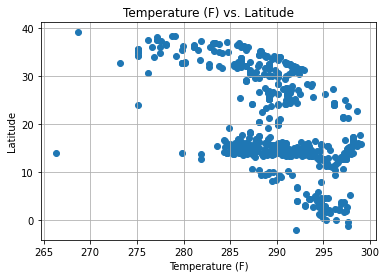

In [11]:
plt.scatter(weather_data["Temperature (F)"], weather_data["Latitude"], marker="o")

plt.title("Temperature (F) vs. Latitude")
plt.ylabel("Latitude")
plt.xlabel("Temperature (F)")
plt.grid(True)
plt.savefig("TemperaturevsLatitude.png")
plt.show()

#### Conclusions
In the previuos graph we can visualize the relathionship between                temperature and latitude of 600 cities across the world. We can conclude        from the graph that the further the city to the ecuador the lowest the          temperature 

## Humidity (%) vs. Latitude

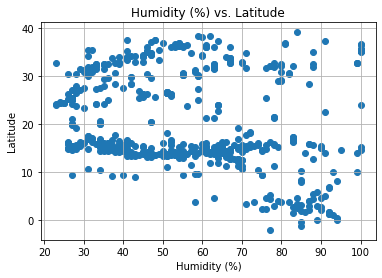

In [12]:
plt.scatter(weather_data["Humidity (%)"], weather_data["Latitude"], marker="o")

plt.title("Humidity (%) vs. Latitude")
plt.ylabel("Latitude")
plt.xlabel("Humidity (%)")
plt.grid(True)
plt.savefig("HumidityvsLatitude.png")
plt.show()

### Conclusions
In the previuos graph we can visualize the relathionship between                humidity and latitude of 600 cities across the world. We can                    conclude from the graph that there is not a clear relantioship between the      two variables, however, the bigger concentration of high temperatures          is at the cities closest to the ecuador 

## Cloudiness (%) vs. Latitude

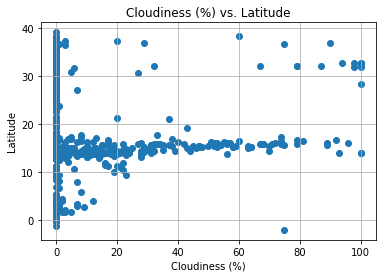

In [13]:
plt.scatter(weather_data["Cloudiness (%)"], weather_data["Latitude"], marker="o")

plt.title("Cloudiness (%) vs. Latitude")
plt.ylabel("Latitude")
plt.xlabel("Cloudiness (%)")
plt.grid(True)
plt.savefig("CloudinessvsLatitude.png")
plt.show()

### Conclusions
In the previuos graph we can visualize the relathionship between                Cloudiness and Latitude of 600 cities across the world. We can                conclude from the graph that the cities located in a latitude between 10 and 20 have a high concentration  of cloudiness.

## Wind Speed (mph) vs. Latitude

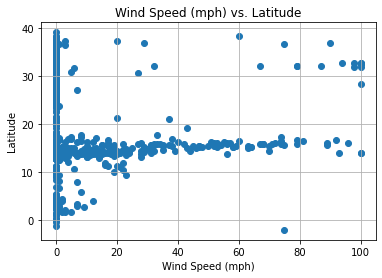

In [14]:
plt.scatter(weather_data["Cloudiness (%)"], weather_data["Latitude"], marker="o")

plt.title("Wind Speed (mph) vs. Latitude")
plt.ylabel("Latitude")
plt.xlabel("Wind Speed (mph)")
plt.grid(True)
plt.savefig("WindSpeedvsLatitude.png")
plt.show()

### Conclusions
In the previuos graph we can visualize the relathionship between                Wind speed and Latitude of 600 cities across the world. The behaviour of this graph is pretty similar at the previous graph.
We can conclude from the graph that the cities located in a latitude between 10 and 20 have a high concentration of wind speed.

In [15]:
Northern_Hemisphere = weather_data.loc[lambda weather_data: weather_data['Latitude'] >= 0]

In [19]:
Southern_Hemisphere=weather_data.loc[lambda weather_data: weather_data['Latitude'] < 0]

In [16]:
Northern_Hemisphere

,CityName,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,Ḩeşār-e Sefīd,34.330502,47.159401,275.15,60,0,0.30
1,‘Ayn Ḩalāqīm,34.940079,36.321911,284.15,71,0,2.06
2,Taglag,38.450001,44.983330,278.80,62,0,2.18
3,Qabāghlū,36.173302,46.168499,276.61,67,0,2.24
4,‘Arīqah,32.889809,36.483360,280.15,70,0,4.12
...,...,...,...,...,...,...,...
595,Al Arţāwīyah,26.505260,45.344372,291.45,28,0,5.08
596,Al ‘Aqīq,20.273581,41.664341,290.15,34,0,2.57
597,Al Awjām,26.563240,49.943310,289.10,51,0,3.60
598,Afif,23.906500,42.917240,289.43,28,1,5.78


In [20]:
Southern_Hemisphere

,CityName,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
58,Republic of Rwanda,-2.00000,30.000000,292.09,77,75,3.60
84,Kismayo,-0.35817,42.545361,297.60,85,0,6.22
115,Buur Gaabo,-1.21933,41.837360,297.66,85,0,4.90


### Northern Hemisphere - Temperature (F) vs. Latitude

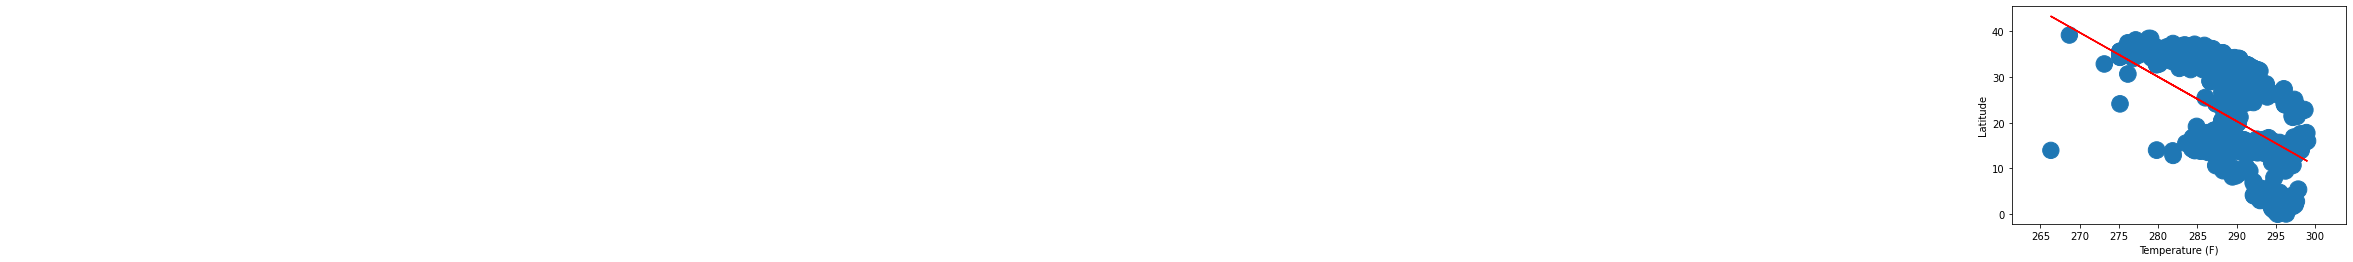

In [91]:
x_values = Northern_Hemisphere['Temperature (F)']
y_values = Northern_Hemisphere['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,marker="o", s=x_values, alpha=1)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=20,color="red")
plt.xlim(min(Northern_Hemisphere['Temperature (F)'])-5, max(Northern_Hemisphere['Temperature (F)'])+5)
plt.xlabel("Temperature (F)")
plt.ylabel('Latitude')
plt.show()

### Southern Hemisphere - Temperature (F) vs. Latitude


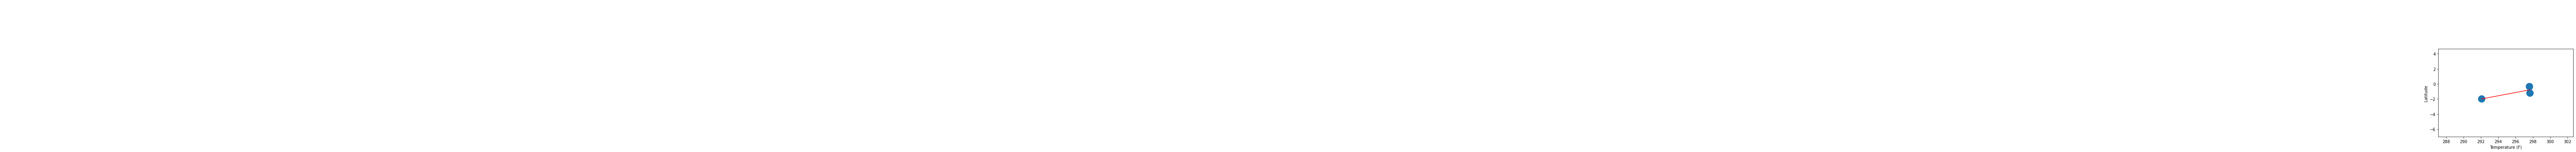

In [97]:
x_values = Southern_Hemisphere['Temperature (F)']
y_values = Southern_Hemisphere['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker="o", s=x_values, alpha=1)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=20,color="red")
plt.xlim(min(Southern_Hemisphere['Temperature (F)'])-5, max(Southern_Hemisphere['Temperature (F)'])+5)
plt.ylim(min(Southern_Hemisphere['Latitude'])-5, max(Southern_Hemisphere['Latitude'])+5)
plt.xlabel("Temperature (F)")
plt.ylabel('Latitude')
plt.show()

### Northern Hemisphere - Humidity (%) vs. Latitude

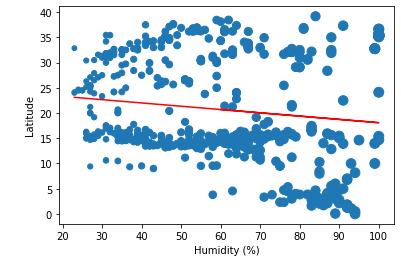

In [92]:
x_values = Northern_Hemisphere['Humidity (%)']
y_values = Northern_Hemisphere['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,marker="o", s=x_values, alpha=1)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=10,color="red")
plt.xlabel("Humidity (%)")
plt.ylabel('Latitude')
plt.show()

### Southern Hemisphere - Humidity (%) vs. Latitude

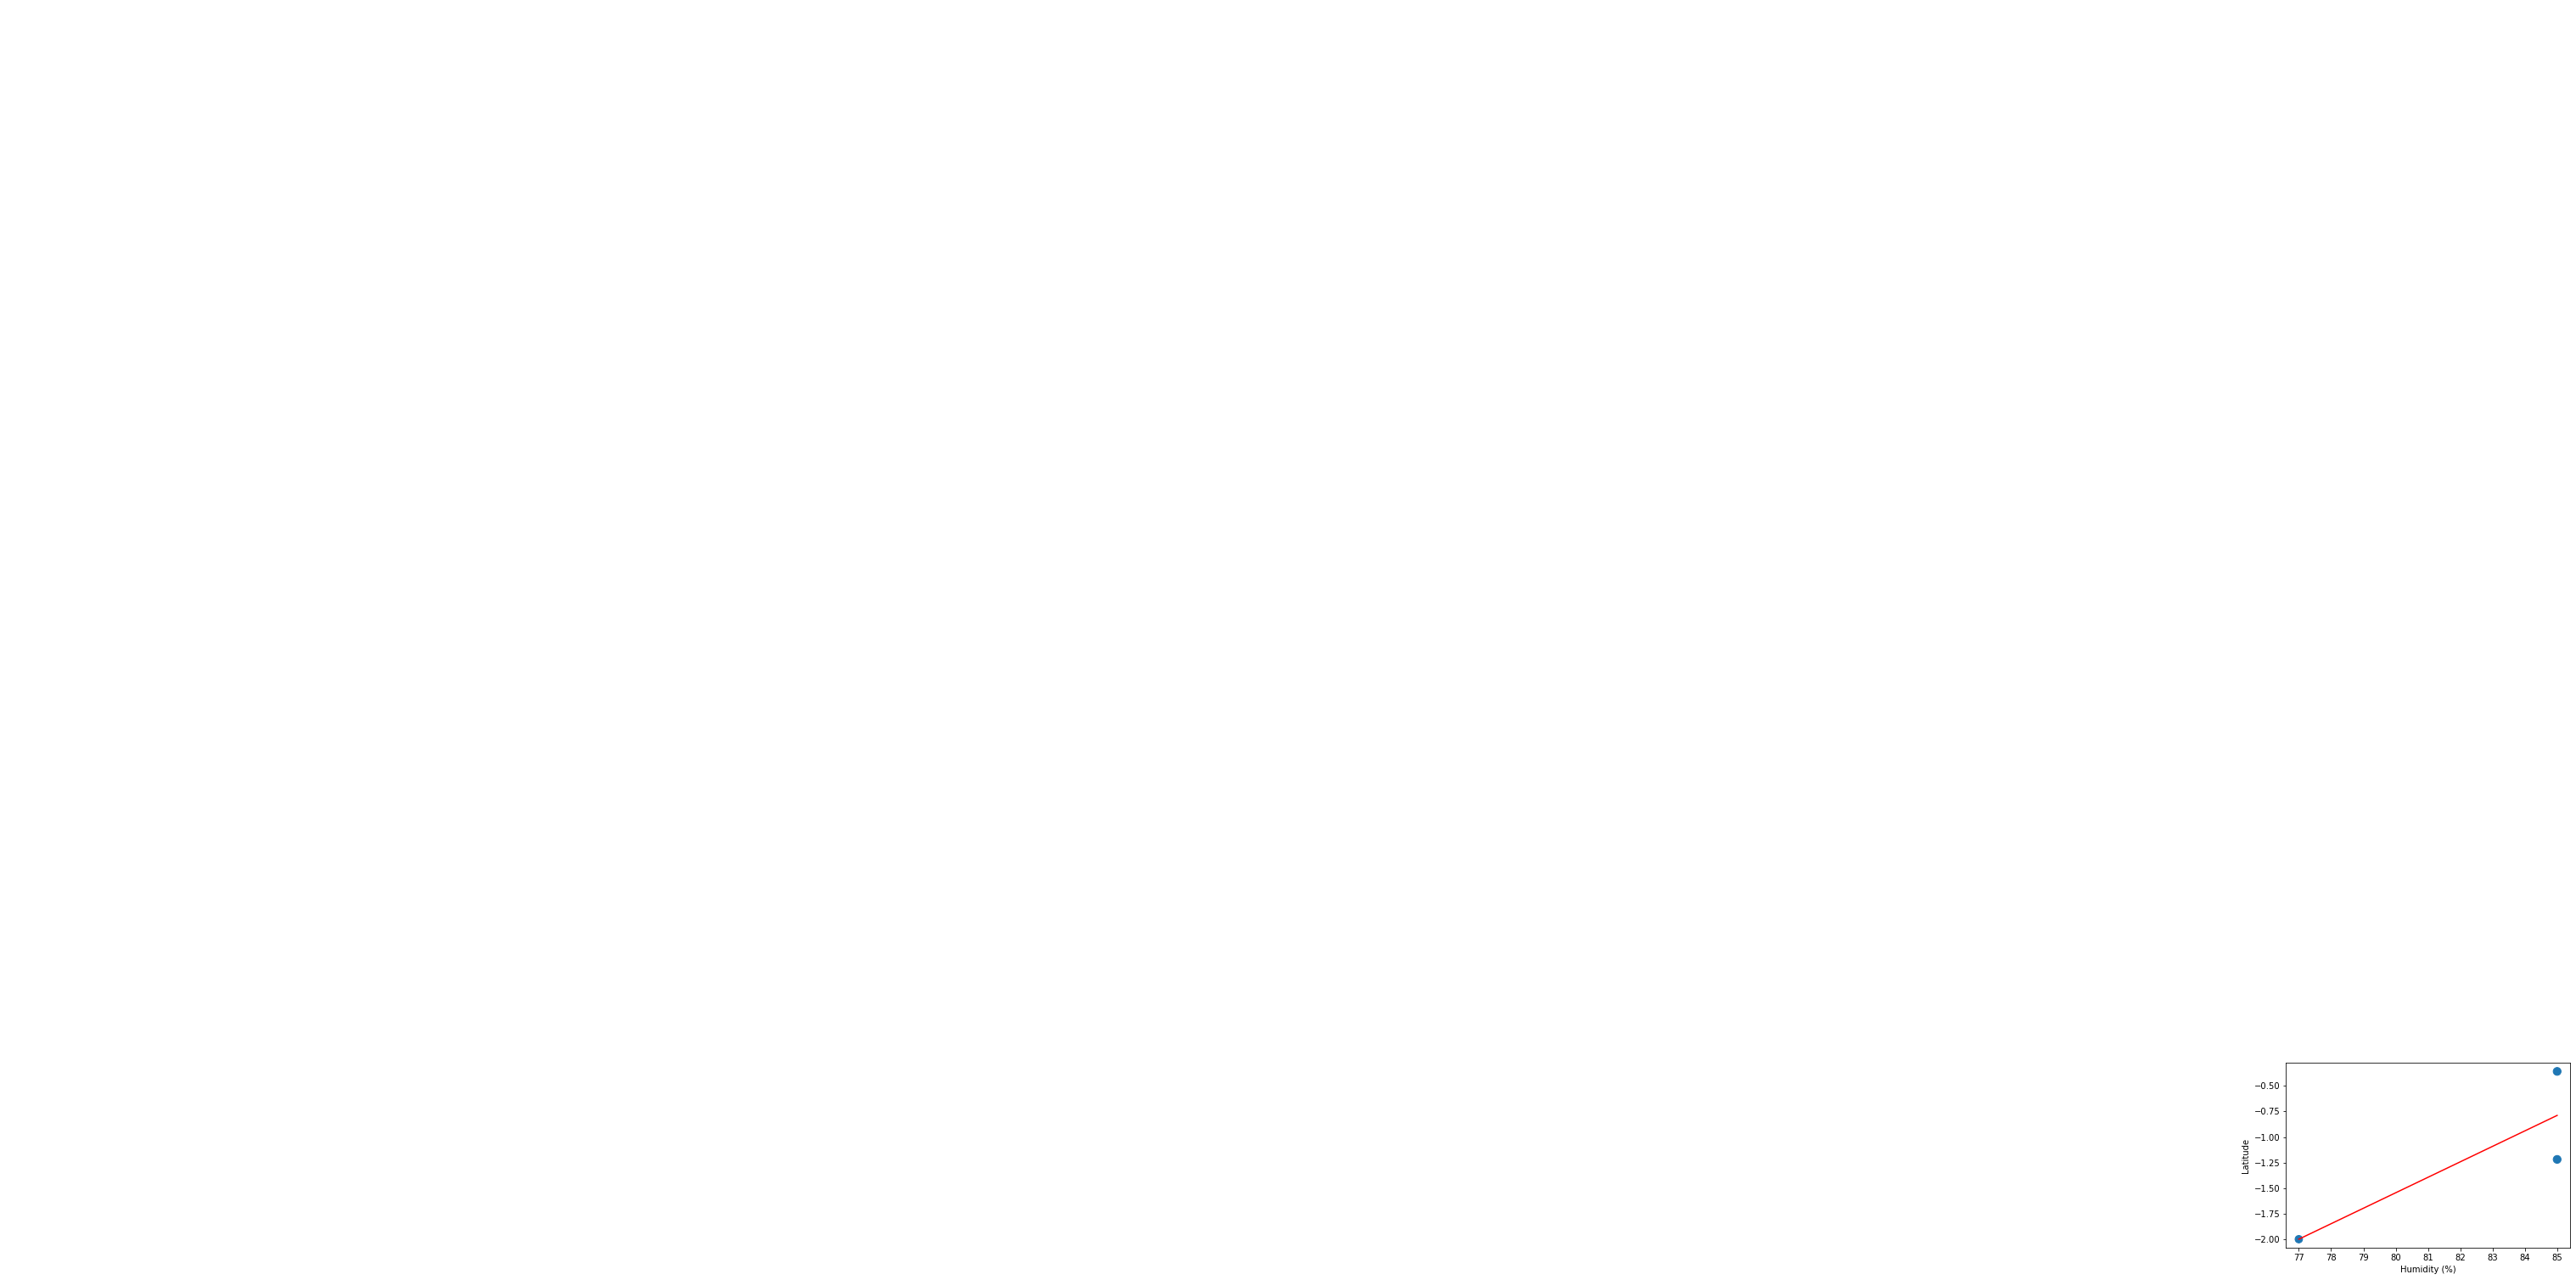

In [98]:
x_values = Southern_Hemisphere['Humidity (%)']
y_values = Southern_Hemisphere['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,marker="o", s=x_values, alpha=1)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=10,color="red")
plt.xlabel("Humidity (%)")
plt.ylabel('Latitude')
plt.show()

### Northern Hemisphere - Humidity (%) vs. Latitude 

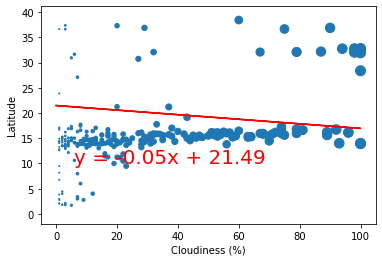

In [84]:
x_values = Northern_Hemisphere['Cloudiness (%)']
y_values = Northern_Hemisphere['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker="o", s=x_values, alpha=1)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=20,color="red")
plt.xlabel("Cloudiness (%)")
plt.ylabel('Latitude')
plt.show()

### Southern Hemisphere - Humidity (%) vs. Latitude 

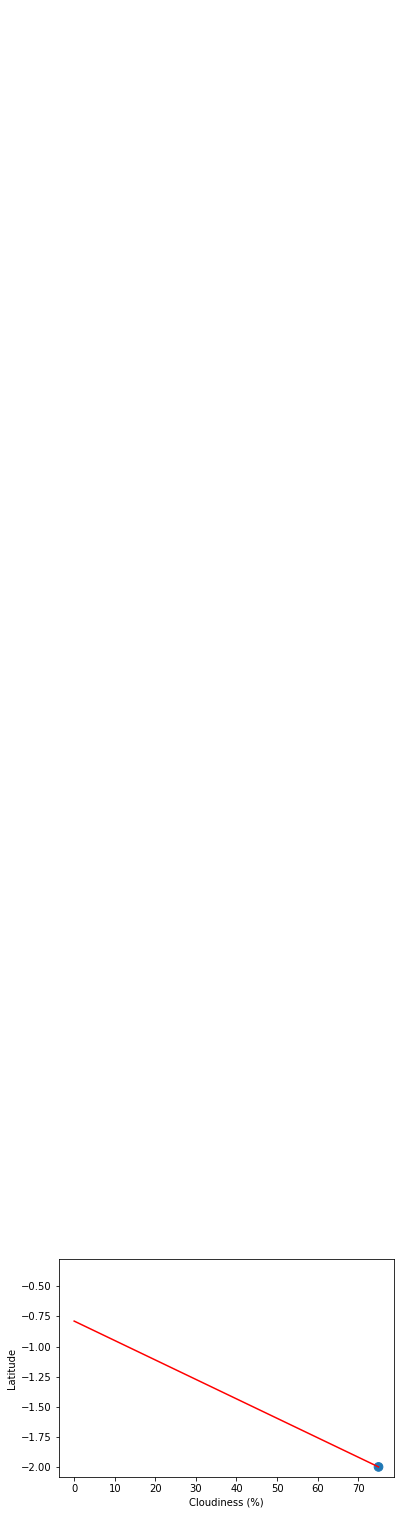

In [99]:
x_values = Southern_Hemisphere['Cloudiness (%)']
y_values = Southern_Hemisphere['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker="o", s=x_values, alpha=1)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=20,color="red")
plt.xlabel("Cloudiness (%)")
plt.ylabel('Latitude')
plt.show()

### Northern Hemisphere - Wind Speed (mph) vs. Latitude 

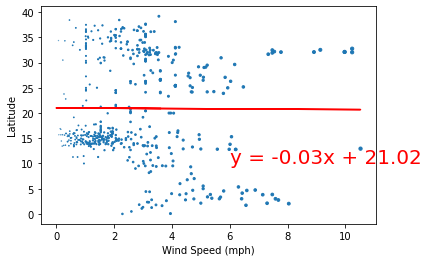

In [87]:
x_values = Northern_Hemisphere['Wind Speed (mph)']
y_values = Northern_Hemisphere['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker="o", s=x_values, alpha=1)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=20,color="red")
plt.xlabel("Wind Speed (mph)")
plt.ylabel('Latitude')
plt.show()

### Southern Hemisphere - Wind Speed (mph) vs. Latitude

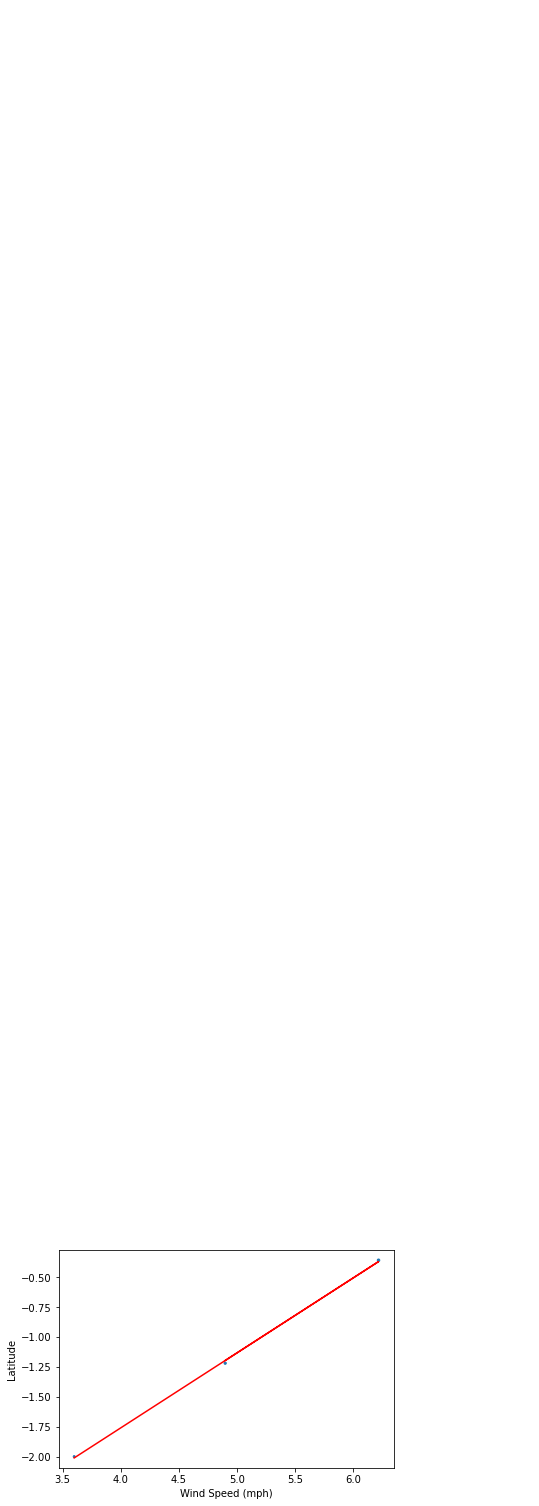

In [100]:
x_values = Southern_Hemisphere['Wind Speed (mph)']
y_values = Southern_Hemisphere['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker="o", s=x_values, alpha=1)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=20,color="red")
plt.xlabel("Wind Speed (mph)")
plt.ylabel('Latitude')
plt.show()